In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv("3-customersatisfaction.csv")

In [5]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


Text(0, 0.5, 'Incentive')

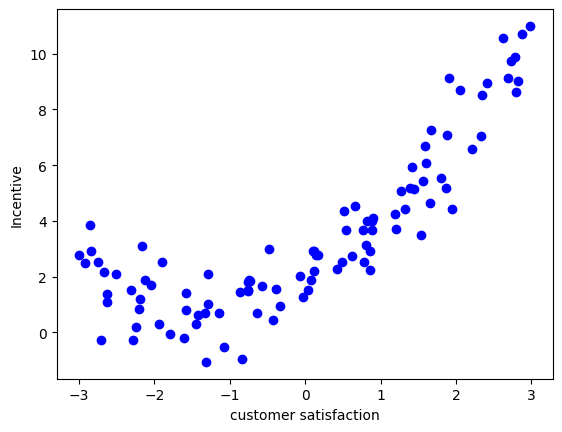

In [9]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"],color = "b")
plt.xlabel("customer satisfaction")
plt.ylabel("Incentive")

In [10]:
# dependent & independent features
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [11]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [12]:
y.head()

0     1.010513
1     2.281043
2     4.415053
3    10.563600
4     0.627365
Name: Incentive, dtype: float64

In [13]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [14]:
X_train

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460
...,...
28,1.191020
0,-1.282447
5,-1.311432
12,0.490521


In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
regression = LinearRegression()

In [18]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = regression.predict(X_test)

In [20]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [21]:
score = r2_score(y_test, y_pred)
score

0.2705652535622246

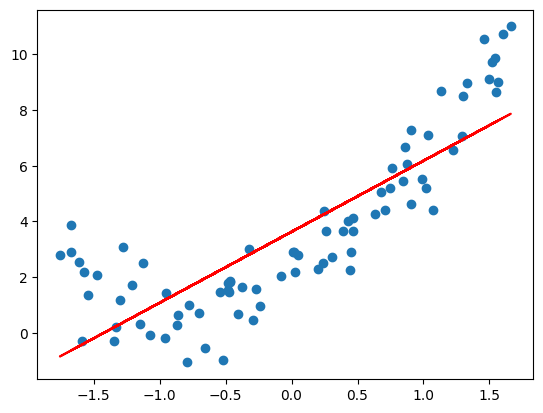

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train),color="r")

In [24]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [25]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [26]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [27]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.7685687698788557

In [29]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [30]:
regression.intercept_

np.float64(2.076676429793281)

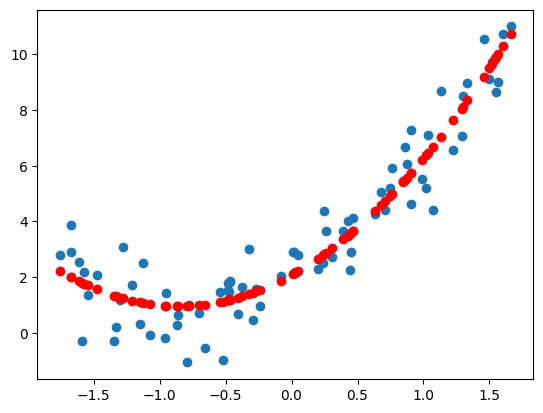

In [32]:
plt.scatter(X_train,y_train)
plt.scatter(X_train, regression.predict(X_train_poly),color="r")

In [34]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [35]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.7573443621401051

In [ ]:
# new data

In [36]:
new_df = pd.read_csv("3-newdatas.csv")

In [37]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [38]:
new_df.rename(columns={"0":"customer satisfaction"},inplace=True)

In [39]:
new_df

,customer satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [41]:
X_new = new_df[["customer satisfaction"]]

In [42]:
X_new

,customer satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [46]:
X_new_scaled = scaler.transform(X_new)

c:\Users\Sanem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
X_new_poly = poly.transform(X_new_scaled)

In [48]:
y_pred_new = regression.predict(X_new_poly)

In [49]:
y_pred_new

array([0.79398732, 0.78800974, 0.7824583 , 0.77733172, 0.77262876,
       0.76834817, 0.76448867, 0.76104903, 0.75802797, 0.75542425,
       0.7532366 , 0.75146377, 0.75010451, 0.74915756, 0.74862165,
       0.74849555, 0.74877797, 0.74946768, 0.75056342, 0.75206392,
       0.75396793, 0.7562742 , 0.75898146, 0.76208847, 0.76559396,
       0.76949668, 0.77379537, 0.77848877, 0.78357564, 0.7890547 ,
       0.79492471, 0.80118441, 0.80783254, 0.81486785, 0.82228908,
       0.83009496, 0.83828426, 0.8468557 , 0.85580803, 0.86514   ,
       0.87485035, 0.88493782, 0.89540116, 0.9062391 , 0.9174504 ,
       0.9290338 , 0.94098803, 0.95331185, 0.966004  , 0.97906321,
       0.99248824, 1.00627782, 1.0204307 , 1.03494563, 1.04982134,
       1.06505659, 1.0806501 , 1.09660064, 1.11290693, 1.12956773,
       1.14658177, 1.16394781, 1.18166458, 1.19973082, 1.21814529,
       1.23690672, 1.25601386, 1.27546545, 1.29526023, 1.31539695,
       1.33587436, 1.35669118, 1.37784618, 1.39933809, 1.42116

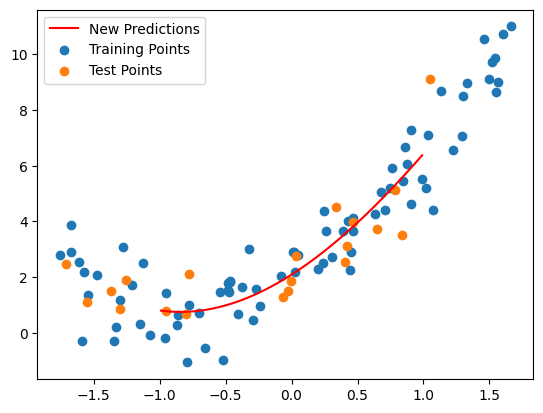

In [57]:
plt.plot(X_new_scaled, y_pred_new,"r",label="New Predictions")
plt.scatter(X_train, y_train, label = "Training Points")
plt.scatter(X_test, y_test, label = "Test Points")

plt.legend()

In [ ]:
#pipeline

In [64]:
def poly_reg(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standard_scaler",scaler),
        ("poly_features", poly_features),
        ("lin_reg",lin_reg)
    ]
    )
    pipeline.fit(X_train,y_train)
    score = pipeline.score(X_test,y_test)
    print("R2 score: ",score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new_scaled, y_pred_new,"r",label="New Predictions")
    plt.scatter(X_train, y_train, label = "Training Points")
    plt.scatter(X_test, y_test, label = "Test Points")
    plt.legend()
    plt.show()

In [60]:
poly_reg(2)

0.7685687698788558


R2 score:  0.2705652535622246


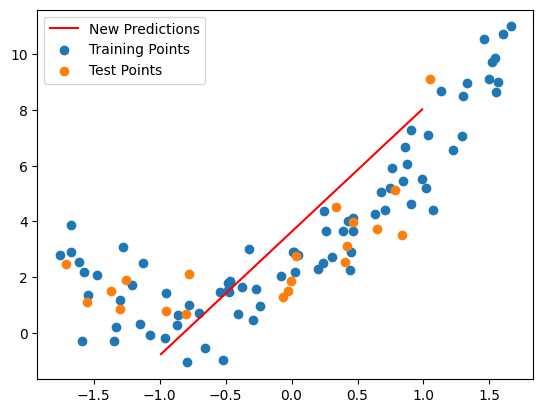

R2 score:  0.7685687698788558


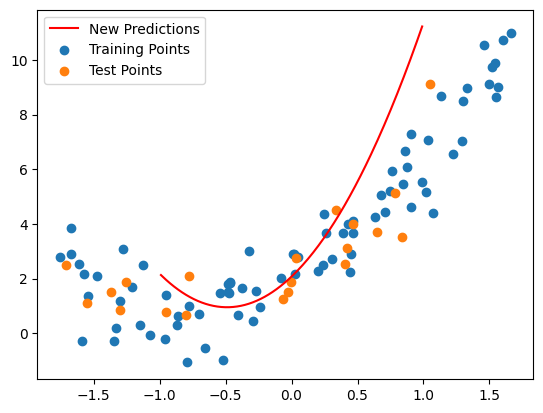

R2 score:  0.7573443621401048


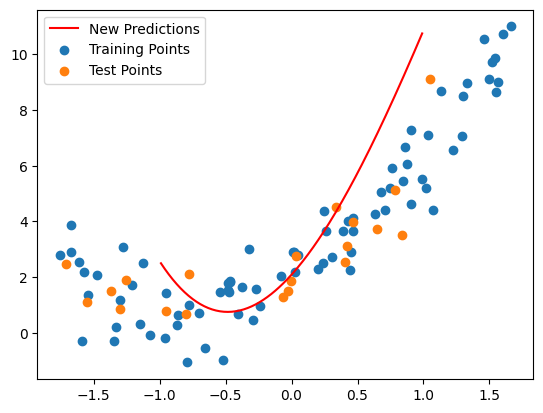

R2 score:  0.7355034443260413


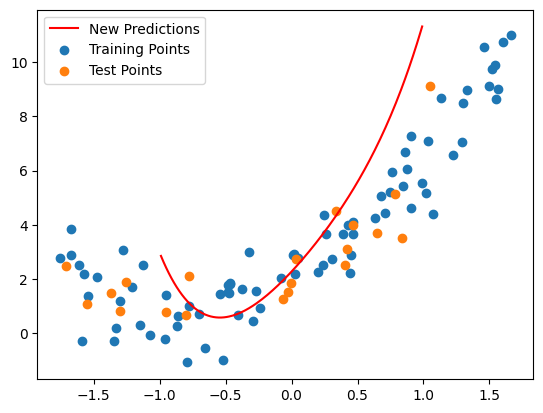

R2 score:  0.7351244165095402


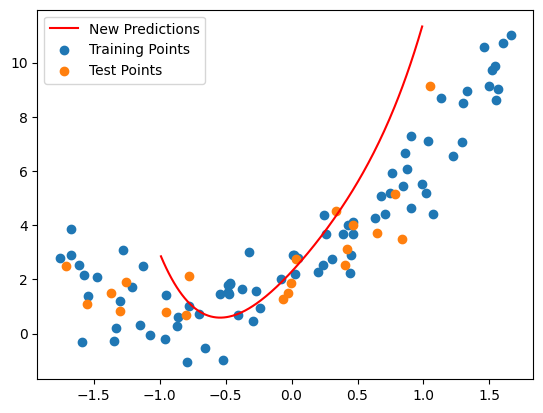

R2 score:  0.734359048213343


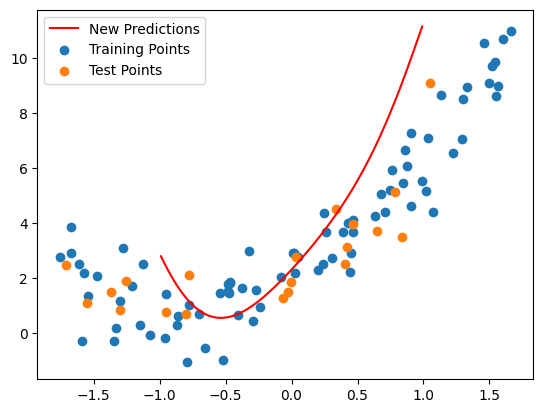

In [65]:
for degree in [1,2,3,4,5,6]:
    poly_reg(degree)